# About this notebook

This notebook loads the local weather data and battery data in one dataframe and visualizes it all together. It also checks for correlations between different features.

## Input
* basePath
* list of things
* list of metrics

## Output
* DataFrame containing the combination of a battery pack and the weather station
* Visualizations of:
    * time-series of the metrics
    * correlation between metrics

# Importing libraries

In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.metrics import mean_squared_error

# Get all data in one DataFrame

### General function

In [2]:
def merge_in_dataframe(thingID, listOfMetrics, basePath):
    """
    This function takes all the merged .csv-files and gathers them in one big DataFrame.
    This DataFrame contains 5min averages of all the values.

    Args:
        thingID: The ID of a Thing as defined on the IoT-stack explorer
        listOfMetrics: List of metrics you want to query as defined on the IoT-stack explorer
        basePath: path to the base folder of your project

    Returns:
        DataFrame containg 5min averages of all the metrics defined in the listOfMetrics.
    """
    for i in range(0,len(listOfMetrics)):
        metricID = listOfMetrics[i]
        # Set path
        if thingID == 'davis.davis.weather.1':
            path=basePath +'\\weather_data'
        else:
            path=basePath + '\\battery_data' + '\\' + str(thingID)
        # Read csv file in DataFrame
        df = pd.read_csv(path+'\\'+metricID+'_merged.csv',usecols=['time','value'])
    
        if(i==0):
            # Select timestamp and value from results
            data = df[['time','value']]
            # Convert object to float (BatteryVoltHR is an object for example)
            data["value"] = pd.to_numeric(data.value, errors='coerce')
            # Rename the column
            data.rename(columns={'value': metricID}, inplace=True)
            # Calculate average for time bin and replace NaN with interpolation
            data['time'] = pd.to_datetime(data.time, unit='ms')
            data = data.resample(rule='5Min', on='time').mean().interpolate()
        else:
            data2 = df[['time','value']]
            # Convert object to float (BatteryVoltHR is an object for example)
            data2["value"] = pd.to_numeric(data2.value, errors='coerce')
            # Rename the column
            data2.rename(columns={'value':metricID}, inplace=True)
            # Calculate average for time bin and replace NaN with interpolation
            data2['time'] = pd.to_datetime(data2.time, unit='ms')
            data2 = data2.resample(rule='5Min', on='time').mean().interpolate()
            data = pd.merge(data, data2, on='time')
        
    return data

## Battery data
All data of a battery pack is loaded in a DataFrame, resampled to 5 min time intervals and merged

### Normal working battery pack

In [3]:
thingID = 'munisense.msup1i70124'
battery_metricsList = ['Power.BatteryState','Power.BatteryVoltHR','Power.PercentageRemaining','Power.TimeRemaining']
basePath = r'D:\Documents\Thesis\Case 1 - data'
# basePath = r'C:\Users\JeffG\Desktop\Case 1 - data'
battery_data_2 = merge_in_dataframe(thingID, battery_metricsList, basePath)
battery_data_2.head()

,Power.BatteryState,Power.BatteryVoltHR,Power.PercentageRemaining,Power.TimeRemaining
time,,,,
2018-08-31 09:45:00,0.0,16.35,98.0,57375.000000
2018-08-31 09:50:00,0.0,16.35,98.0,57374.819277
2018-08-31 09:55:00,0.0,16.35,98.0,57374.638554
2018-08-31 10:00:00,0.0,16.35,98.0,57374.457831
2018-08-31 10:05:00,0.0,16.35,98.0,57374.277108


### Faulty battery pack

In [4]:
thingID = 'munisense.msup1g30034'
battery_metricsList = ['Power.BatteryState','Power.BatteryVoltHR','Power.PercentageRemaining','Power.TimeRemaining']
battery_data_1 = merge_in_dataframe(thingID, battery_metricsList, basePath)
battery_data_1.head()

,Power.BatteryState,Power.BatteryVoltHR,Power.PercentageRemaining,Power.TimeRemaining
time,,,,
2018-08-31 09:50:00,0.0,15.995,84.0,49005.0
2018-08-31 09:55:00,0.0,15.995,84.0,49005.0
2018-08-31 10:00:00,0.0,15.990,84.0,49005.0
2018-08-31 10:05:00,0.0,16.000,84.0,49005.0
2018-08-31 10:10:00,0.0,16.000,84.0,49005.0


## Weather data
All weather data is loaded in a DataFrame, resampled to 5 min time intervals and merged

In [5]:
thingID = 'davis.davis.weather.1'
metricsList = ['environment.light','environment.temperature','weather.uv','environment.relativehumidity','weather.pressure', 'weather.rainrate', 'weather.windspeed']
weather_data = merge_in_dataframe(thingID, metricsList, basePath)
weather_data.head()

,environment.light,environment.temperature,weather.uv,environment.relativehumidity,weather.pressure,weather.rainrate,weather.windspeed
time,,,,,,,
2018-08-31 09:45:00,95338.168421,17.716316,2.007368,57.000000,1024.409158,0.0,2.033684
2018-08-31 09:50:00,95245.765697,17.716189,2.004979,57.019048,1024.403599,0.0,2.032264
2018-08-31 09:55:00,95153.362974,17.716063,2.002589,57.038095,1024.398041,0.0,2.030845
2018-08-31 10:00:00,95060.960250,17.715936,2.000199,57.057143,1024.392482,0.0,2.029425
2018-08-31 10:05:00,94968.557527,17.715810,1.997810,57.076190,1024.386924,0.0,2.028005


## All data
Battery data and weather data are merged in one big DataFrame

### Normal working battery pack

In [6]:
data_1 = pd.merge(battery_data_1, weather_data, on='time')
#data.to_csv(r'C:\Users\JeffG\Desktop\Case 1 - data\all_data.csv')
data_1.head()

,Power.BatteryState,Power.BatteryVoltHR,Power.PercentageRemaining,Power.TimeRemaining,environment.light,environment.temperature,weather.uv,environment.relativehumidity,weather.pressure,weather.rainrate,weather.windspeed
time,,,,,,,,,,,
2018-08-31 09:50:00,0.0,15.995,84.0,49005.0,95245.765697,17.716189,2.004979,57.019048,1024.403599,0.0,2.032264
2018-08-31 09:55:00,0.0,15.995,84.0,49005.0,95153.362974,17.716063,2.002589,57.038095,1024.398041,0.0,2.030845
2018-08-31 10:00:00,0.0,15.990,84.0,49005.0,95060.960250,17.715936,2.000199,57.057143,1024.392482,0.0,2.029425
2018-08-31 10:05:00,0.0,16.000,84.0,49005.0,94968.557527,17.715810,1.997810,57.076190,1024.386924,0.0,2.028005
2018-08-31 10:10:00,0.0,16.000,84.0,49005.0,94876.154803,17.715683,1.995420,57.095238,1024.381365,0.0,2.026585


### Faulty battery pack

In [7]:
data_2 = pd.merge(battery_data_2, weather_data, on='time')
#data.to_csv(r'C:\Users\JeffG\Desktop\Case 1 - data\all_data.csv')
data_2.head()

,Power.BatteryState,Power.BatteryVoltHR,Power.PercentageRemaining,Power.TimeRemaining,environment.light,environment.temperature,weather.uv,environment.relativehumidity,weather.pressure,weather.rainrate,weather.windspeed
time,,,,,,,,,,,
2018-08-31 09:45:00,0.0,16.35,98.0,57375.000000,95338.168421,17.716316,2.007368,57.000000,1024.409158,0.0,2.033684
2018-08-31 09:50:00,0.0,16.35,98.0,57374.819277,95245.765697,17.716189,2.004979,57.019048,1024.403599,0.0,2.032264
2018-08-31 09:55:00,0.0,16.35,98.0,57374.638554,95153.362974,17.716063,2.002589,57.038095,1024.398041,0.0,2.030845
2018-08-31 10:00:00,0.0,16.35,98.0,57374.457831,95060.960250,17.715936,2.000199,57.057143,1024.392482,0.0,2.029425
2018-08-31 10:05:00,0.0,16.35,98.0,57374.277108,94968.557527,17.715810,1.997810,57.076190,1024.386924,0.0,2.028005


# Exploration

## Data types

In [8]:
for metricID in metricsList:
    test = pd.read_csv('D:\Documents\Thesis\Case 1 - data\weather_data' + '/' + metricID + '_merged.csv',usecols=['time','value'])
    print(str(metricID) + ': ' + str(len(test)) + ' - ' + str(test.dtypes))

environment.light: 8658226 - time     int64
value    int64
dtype: object
environment.temperature: 8650769 - time       int64
value    float64
dtype: object
weather.uv: 8649794 - time       int64
value    float64
dtype: object
environment.relativehumidity: 8651416 - time     int64
value    int64
dtype: object
weather.pressure: 8786123 - time       int64
value    float64
dtype: object
weather.rainrate: 8788486 - time       int64
value    float64
dtype: object
weather.windspeed: 8796119 - time       int64
value    float64
dtype: object


In [9]:
data_1.describe()

,Power.BatteryState,Power.BatteryVoltHR,Power.PercentageRemaining,Power.TimeRemaining,environment.light,environment.temperature,weather.uv,environment.relativehumidity,weather.pressure,weather.rainrate,weather.windspeed
count,43274.000000,43274.000000,43274.000000,43274.000000,43274.000000,43274.000000,43274.000000,43274.000000,43274.000000,43274.000000,43274.000000
mean,1.639605,10.734806,21.080285,12239.671558,15692.573263,10.480182,0.198485,78.032406,1018.067283,0.074037,4.188591
std,2.168789,4.994240,29.536338,17237.679535,32076.317171,6.027535,0.564178,12.783706,26.100754,3.112602,2.974463
min,0.000000,1.700000,0.000000,0.000000,0.000000,-2.777407,0.000000,31.000000,0.000000,0.000000,0.000000
25%,0.000000,5.905056,0.000000,0.000000,0.000000,5.970648,0.000000,71.083674,1011.884213,0.000000,1.997593
50%,0.000000,11.795000,0.000000,0.000000,0.000000,9.761821,0.000000,81.598765,1019.349927,0.000000,3.615452
75%,3.404762,14.910000,43.000000,25155.000000,13365.689815,14.454506,0.000000,88.000000,1025.201975,0.000000,5.783318
max,7.000000,16.145000,86.000000,50355.000000,244246.234286,27.401605,4.204667,96.000000,1041.568148,640.696296,23.871173


## Visualization metrics
The different metrics of a normal battery pack and the weather variables are plotted as time-series

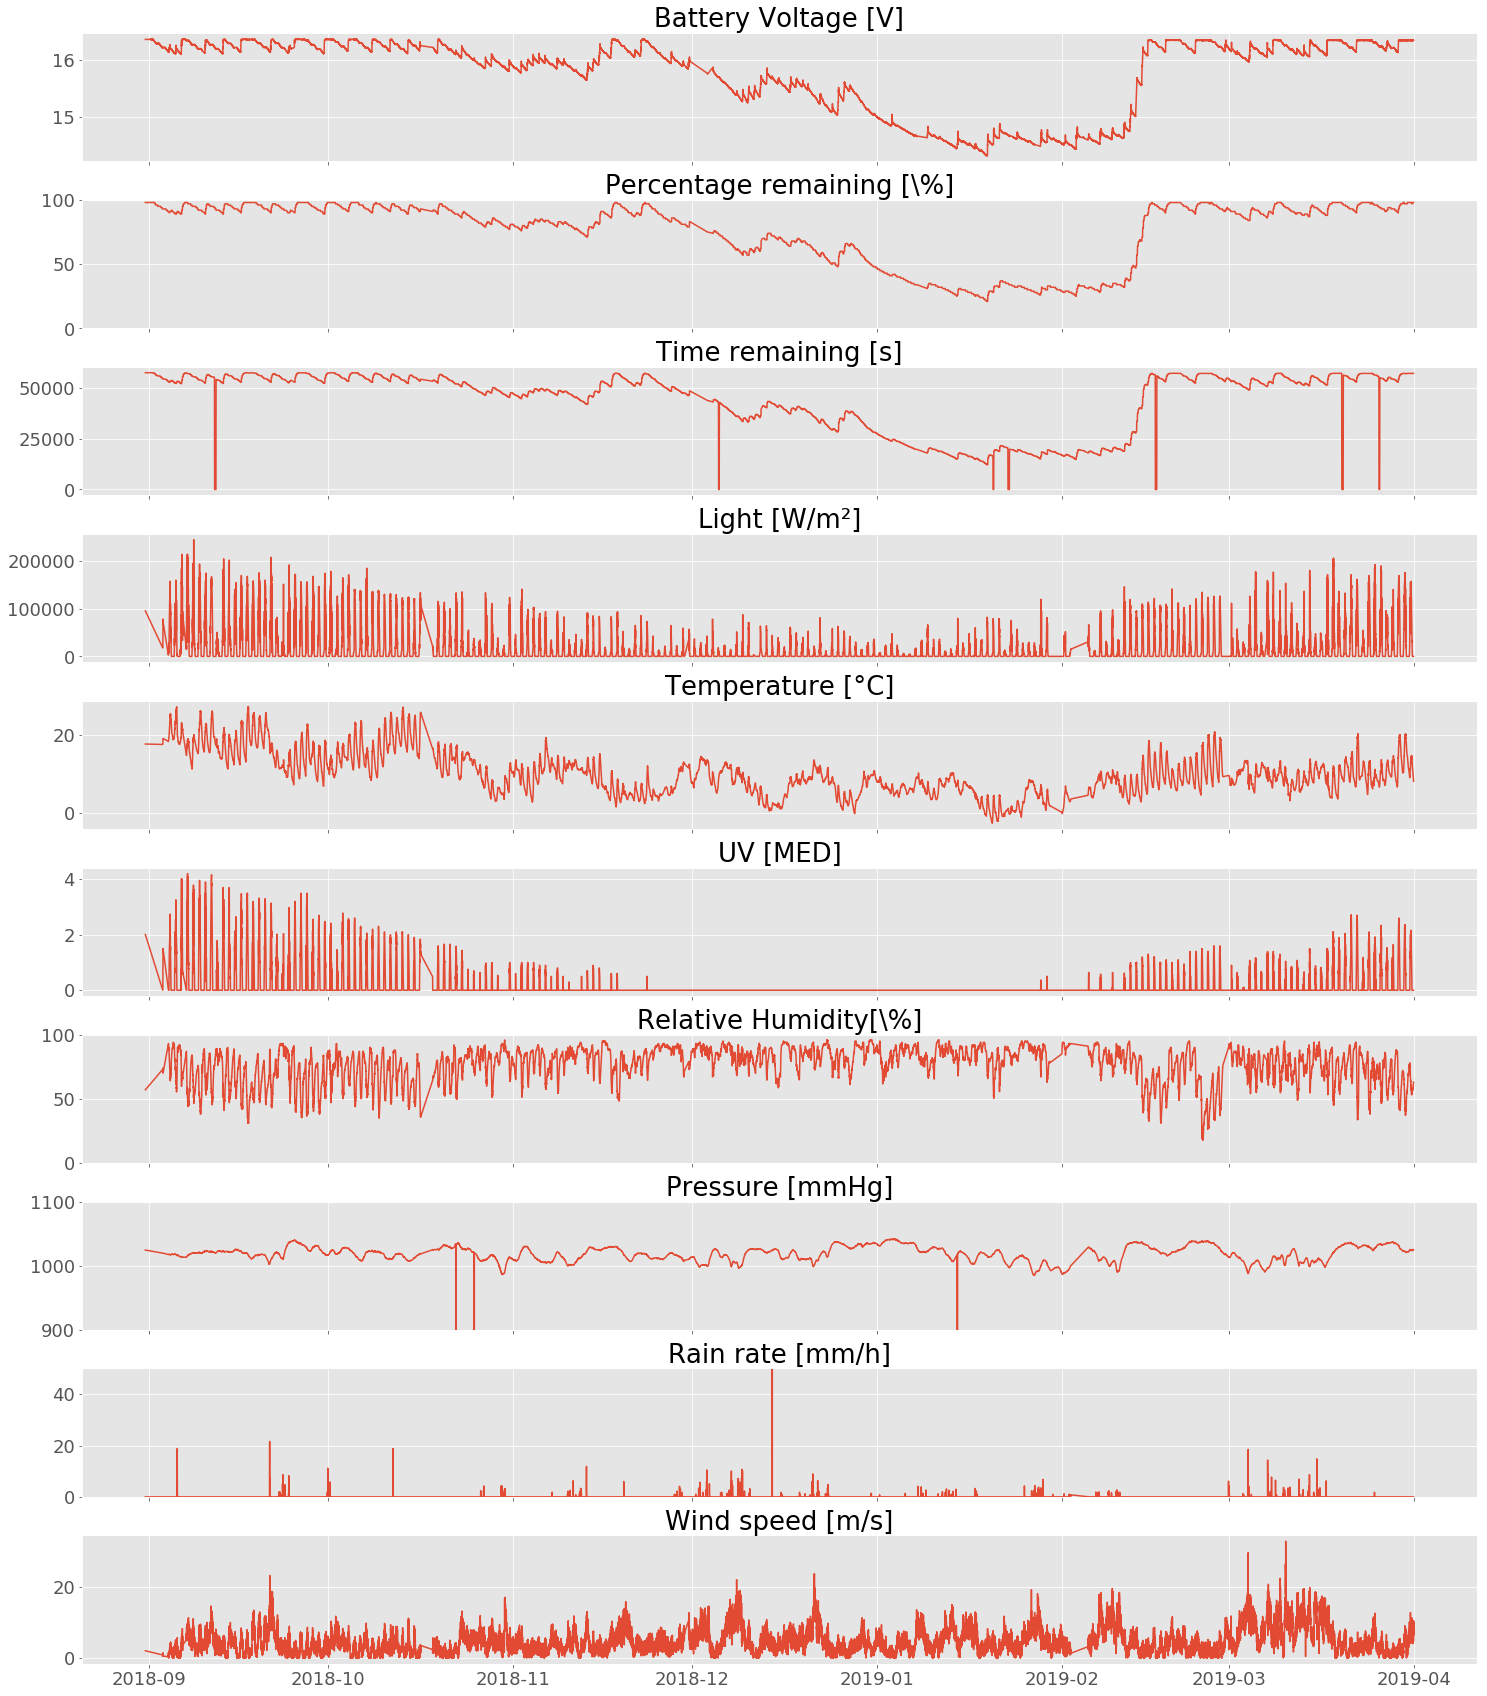

In [16]:
import matplotlib.pyplot as plt
matplotlib.rcParams['interactive'] == True

data = data_2.copy()

fig, axs = plt.subplots(10, 1, sharex=True, figsize=(25,30))
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0.3)

# Plot each graph, and manually set the y tick values
axs[0].plot(data.index, data['Power.BatteryVoltHR'])
axs[0].set_title('Battery Voltage [V]')

axs[1].plot(data.index, data['Power.PercentageRemaining'])
axs[1].set_ylim(0, 100)
axs[1].set_title('Percentage remaining [\%]')

axs[2].plot(data.index, data['Power.TimeRemaining'])
axs[2].set_title('Time remaining [s]')

axs[3].plot(data.index, data['environment.light'])
axs[3].set_title('Light [W/m²]')

axs[4].plot(data.index, data['environment.temperature'])
axs[4].set_title('Temperature [°C]')

axs[5].plot(data.index, data['weather.uv'])
axs[5].set_title('UV [MED]')

axs[6].plot(data.index, data['environment.relativehumidity'])
axs[6].set_ylim(0, 100)
axs[6].set_title('Relative Humidity[\%]')

axs[7].plot(data.index, data['weather.pressure'])
axs[7].set_title('Pressure [mmHg]')
axs[7].set_ylim(900, 1100)

axs[8].plot(data.index, data['weather.rainrate'])
axs[8].set_title('Rain rate [mm/h]')
axs[8].set_ylim(0, 50)

axs[9].plot(data.index, data['weather.windspeed'])
axs[9].set_title('Wind speed [m/s]')

plt.rcParams.update({'font.size': 18})

plt.savefig(r'C:\Users\Jeff\Dropbox\ICT-Elektronica\Thesis\Text\fig'+'/CH3_data_visualization')
plt.show()


## Visualization of the correlation
Correlation between the different metrics is calculated and plotted

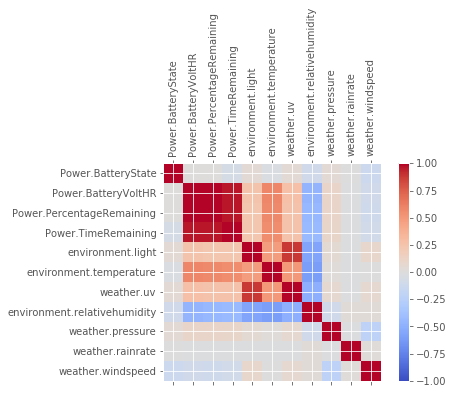

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = data_2.copy()

corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
fig.savefig(r'C:\Users\JeffG\Dropbox\ICT-Elektronica\Thesis\Text\fig\CH3_correlation.png', bbox_inches="tight")
# fig.savefig(r'C:\Users\Jeff\Dropbox\ICT-Elektronica\Thesis\Case 1 - failing battery pack\Images\correlation.png')
plt.show()

## Light intensity vs Battery voltage
A more detailed comparison between the light intensities and the battery voltage

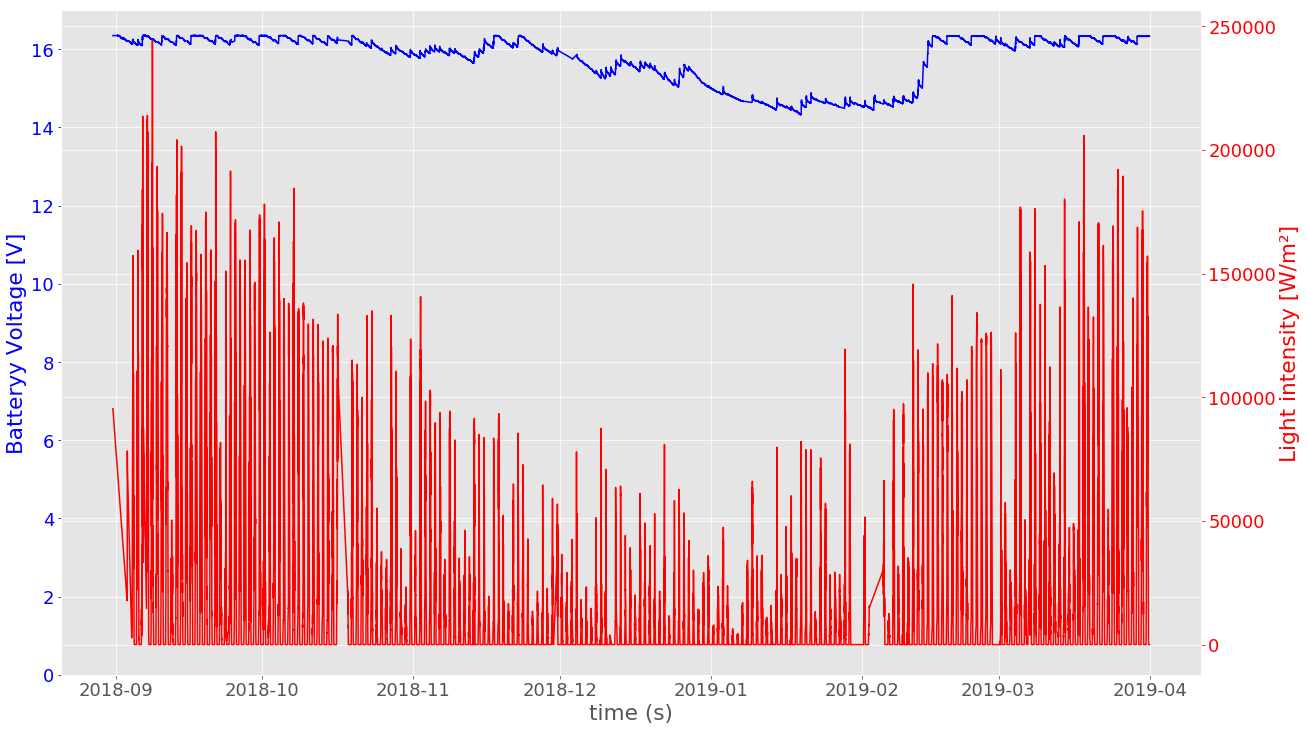

<Figure size 1080x720 with 0 Axes>

In [25]:
data = data_2.copy()

fig, ax1 = plt.subplots()
plt.figure(figsize=(15,10))

x1=data.index
y1=data['Power.BatteryVoltHR']
ax1.plot(x1, y1, 'b-')
ax1.set_xlabel('time (s)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Batteryy Voltage [V]', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim([0,17])

ax2 = ax1.twinx()
x2=data.index
y2=data['environment.light']
ax2.plot(x2, y2, 'r-')
ax2.set_ylabel('Light intensity [W/m²]', color='r')
ax2.tick_params('y', colors='r')

plt.rcParams.update({'font.size': 18})
fig.set_size_inches(18.5, 10.5)

fig.tight_layout()
fig.savefig(r'C:\Users\JeffG\Dropbox\ICT-Elektronica\Thesis\Text\fig\CH3_volt_light_2.png', bbox_inches="tight")
plt.show()